In [26]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = sns.load_dataset("penguins")

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


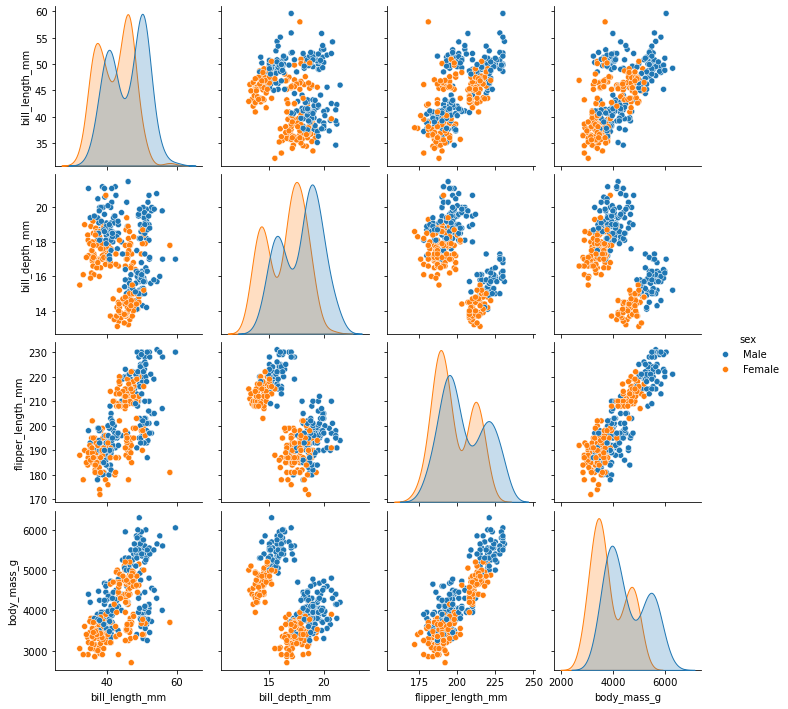

In [10]:
sns.pairplot(df, hue="sex")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Count'>

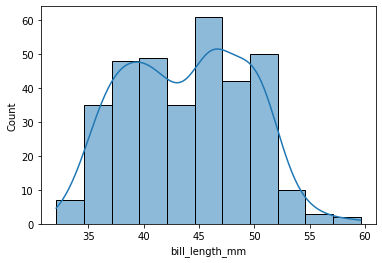

In [17]:
sns.histplot(df['bill_length_mm'], kde=True)

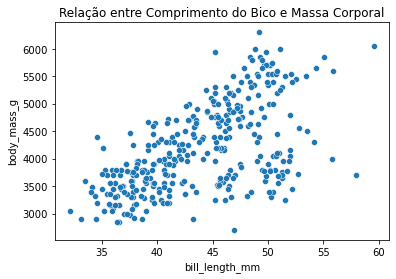

In [27]:
sns.scatterplot(x='bill_length_mm', y='body_mass_g', data=df)
plt.title('Relação entre Comprimento do Bico e Massa Corporal')
plt.show()

In [29]:
df[['bill_length_mm', 'body_mass_g']].corr()

,bill_length_mm,body_mass_g
bill_length_mm,1.00000,0.59511
body_mass_g,0.59511,1.00000


In [15]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [36]:
df1.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [56]:
data_one_hot = pd.get_dummies(df, columns=['sex', 'island'])

In [57]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
data_one_hot['species'] = label_encoder.fit_transform(data_one_hot['species'])

In [58]:
data_one_hot

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex_Female,sex_Male,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,1,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,0,1
3,0,NaN,NaN,NaN,NaN,0,0,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
339,2,NaN,NaN,NaN,NaN,0,0,1,0,0
340,2,46.8,14.3,215.0,4850.0,1,0,1,0,0
341,2,50.4,15.7,222.0,5750.0,0,1,1,0,0
342,2,45.2,14.8,212.0,5200.0,1,0,1,0,0


In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalizar = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

# Aplicando o MinMaxScaler nas colunas selecionadas
df_normalized = scaler.fit_transform(data_one_hot[normalizar])
df_normalized = pd.DataFrame(df_normalized, columns=normalizar)

df_normalized = pd.concat([df_normalized, data_one_hot[['species',
                                                       'sex_Female', 'sex_Male', 'island_Biscoe', 'island_Dream', 'island_Torgersen']]], axis=1)

In [60]:
df_limpo = df_normalized.dropna()

In [61]:
df_limpo.isnull().sum()

bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
species              0
sex_Female           0
sex_Male             0
island_Biscoe        0
island_Dream         0
island_Torgersen     0
dtype: int64

In [62]:
df_limpo

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species,sex_Female,sex_Male,island_Biscoe,island_Dream,island_Torgersen
0,0.254545,0.666667,0.152542,0.291667,0,0,1,0,0,1
1,0.269091,0.511905,0.237288,0.305556,0,1,0,0,0,1
2,0.298182,0.583333,0.389831,0.152778,0,1,0,0,0,1
4,0.167273,0.738095,0.355932,0.208333,0,1,0,0,0,1
5,0.261818,0.892857,0.305085,0.263889,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
338,0.549091,0.071429,0.711864,0.618056,2,1,0,1,0,0
340,0.534545,0.142857,0.728814,0.597222,2,1,0,1,0,0
341,0.665455,0.309524,0.847458,0.847222,2,0,1,1,0,0
342,0.476364,0.202381,0.677966,0.694444,2,1,0,1,0,0


In [65]:
from sklearn.model_selection import train_test_split

x = df_limpo.drop(['species'], axis=1)
y = df_limpo['species']

X_treino, X_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.3, random_state=0)

In [70]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [93]:
#Árvore de Decisão
decision = DecisionTreeClassifier()

In [94]:
decision.fit(X_treino, y_treino)
predictions_dt = decision.predict(X_teste)

In [96]:
from sklearn.ensemble import RandomForestClassifier

In [97]:
#RandomForest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

rf.fit(X_treino, y_treino)
predictions_rf = rf.predict(X_teste)

In [100]:
#Bagging
bagging_model = BaggingClassifier( estimator=DecisionTreeClassifier(max_depth=2, 
                                                                    max_features=1), 
                                                                    n_estimators=10, random_state=42)

In [72]:
bagging_model.fit(X_treino, y_treino)
predictions = bagging_model.predict(X_teste)

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
#AdaBoost
shallow_decision_tree = DecisionTreeClassifier(max_depth=1)

ada_clf = AdaBoostClassifier(estimator=shallow_decision_tree, n_estimators=100, random_state=42, algorithm="SAMME")

In [78]:
ada_clf.fit(X_treino, y_treino)
predictions_ada = ada_clf.predict(X_teste)

In [80]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [85]:
#Stacking
base_learners  = [
    ('decision_tree', DecisionTreeClassifier(max_depth=1)),
    ('lr', LogisticRegression())
]

In [86]:
meta_learner = SVC(probability=True, random_state=42)

In [87]:
stack = StackingClassifier(estimators=base_learners, final_estimator=meta_learner, cv=5)

In [88]:
stack.fit(X_treino, y_treino)
predictions_st = stack.predict(X_teste)

In [95]:
print("Arvore de Decisão simples")
print("")
print(classification_report(y_teste, predictions_dt))
print("")
print(confusion_matrix(y_teste, predictions_dt))
print("")
print("Acurácia:", accuracy_score(y_teste, predictions_dt))

Arvore de Decisão simples

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00        36

    accuracy                           0.98       103
   macro avg       0.99      0.96      0.97       103
weighted avg       0.98      0.98      0.98       103


[[50  0  0]
 [ 2 15  0]
 [ 0  0 36]]

Acurácia: 0.9805825242718447


In [101]:
print("RandomForest")
print("")
print(classification_report(y_teste, predictions_rf))
print("")
print(confusion_matrix(y_teste, predictions_rf))
print("")
print("Acurácia:", accuracy_score(y_teste, predictions_rf))

RandomForest

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00        36

    accuracy                           0.98       103
   macro avg       0.99      0.96      0.97       103
weighted avg       0.98      0.98      0.98       103


[[50  0  0]
 [ 2 15  0]
 [ 0  0 36]]

Acurácia: 0.9805825242718447


In [102]:
print("Bagging Classifier")
print("")
print(classification_report(y_teste, predictions))
print("")
print(confusion_matrix(y_teste, predictions))
print("")
print("Acurácia:", accuracy_score(y_teste, predictions))

Bagging Classifier

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        50
           1       1.00      0.53      0.69        17
           2       1.00      1.00      1.00        36

    accuracy                           0.92       103
   macro avg       0.95      0.84      0.87       103
weighted avg       0.93      0.92      0.91       103


[[50  0  0]
 [ 8  9  0]
 [ 0  0 36]]

Acurácia: 0.9223300970873787


In [103]:
print("Boosting")
print("")
print(classification_report(y_teste, predictions_ada))
print("")
print(confusion_matrix(y_teste, predictions_ada))
print("")
print("Acurácia:", accuracy_score(y_teste, predictions_ada))

Boosting

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00        36

    accuracy                           0.98       103
   macro avg       0.99      0.96      0.97       103
weighted avg       0.98      0.98      0.98       103


[[50  0  0]
 [ 2 15  0]
 [ 0  0 36]]

Acurácia: 0.9805825242718447


In [104]:
print("Stacking")
print("")
print(classification_report(y_teste, predictions_st))
print("")
print(confusion_matrix(y_teste, predictions_st))
print("")
print("Acurácia:", accuracy_score(y_teste, predictions_st))

Stacking

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.88      0.94        17
           2       1.00      1.00      1.00        36

    accuracy                           0.98       103
   macro avg       0.99      0.96      0.97       103
weighted avg       0.98      0.98      0.98       103


[[50  0  0]
 [ 2 15  0]
 [ 0  0 36]]

Acurácia: 0.9805825242718447


Stacking, Boosting, Árvore de Decisão e Floresta Aleatória tiveram resultados iguais com acurácia de 0.980.


Bagging teve um desempenho abaixo, com o menor recall e acurácia (0.53 e 0.922, respectivamente)

Assim, parece que os modelos utilizados ficaram bem ajustados aos dados com exceção do modelo de Bagging, que deve melhorar com alguns ajstes de parâmetro.